In [1]:
%%html 
<link href="https://fonts.googleapis.com/css?family=Open+Sans" rel="stylesheet">
<style>#notebook-container{font-size: 13pt;font-family:'Open Sans', sans-serif;} div.text_cell{max-width: 104ex;}</style>

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 3D to 2D projection

To generate a 3D scene with 2D to 3D projection the following is required:

* A vector with 4 elements: $[x,y,z,w]$.
* A mesh to hold all the vertices for an object.
  * The position of the object.
  * The rotation of the object.
* Matrices
  * World matrix ($M_{world}$)
  * View matrix ($M_{view}$)
  * Projection matrix ($M_{proj}$)
* Rendering
  * Rendering the meshes
  * World view projection matrix ($M_{wvp}$)
  * Drawing an image

**Pipeline**

![pipeline](https://www.scratchapixel.com/images/upload/perspective-matrix/vertex-transform-pipeline.png?)
  
**Sources:**

* https://www.reddit.com/r/cpp/comments/3g1pvf/i_want_to_create_a_3d_engine_from_scratch_where/
* https://www.davrous.com/2013/06/13/tutorial-series-learning-how-to-write-a-3d-soft-engine-from-scratch-in-c-typescript-or-javascript/
* http://web.archive.org/web/20131222170415/http:/robertokoci.com/world-view-projection-matrix-unveiled/
* http://www.opengl-tutorial.org/beginners-tutorials/tutorial-3-matrices/
* https://www.scratchapixel.com/lessons/3d-basic-rendering/perspective-and-orthographic-projection-matrix/projection-matrices-what-you-need-to-know-first
* https://www.scratchapixel.com/lessons/3d-basic-rendering/perspective-and-orthographic-projection-matrix/opengl-perspective-projection-matrix

## Vertices to top-view map

In [3]:
from PIL import *

In [4]:
def TopViewMap(w, h, vertices):
    # Create a new image to draw onto.
    viewport = (400, 400)
    img = Image.new('RGB', (viewport[0], viewport[1]), 'black')
    pixels = img.load()
    
    # Show each vertex top-down with x and z.
    for vertex in vertices:
        # Move the vertex to the center and normalize the result.
        worldX = (vertex.x + (w / 2)) / w
        worldY = (vertex.z + (h / 2)) / h
        print('{} {}'.format(worldX, worldY))
        
        # Mark the normalized point onto the canvas
        pixels[round(worldX * viewport[0]), round(worldY * viewport[1])] = (255, 0, 0)
        
    # Mark the origin.
    pixels[viewport[0] / 2, viewport[1] / 2] = (0, 255, 0)
    return img

## Render Pipeline

In [5]:
class Vec3():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def __repr__(self):
        return '({}, {}, {})'.format(self.x, self.y, self.z)

In [22]:
class Mesh():
    position = Vec3(0,0,0)
    
    def __init__(self, name):
        self.name = name
        self.vertices = []
        
    def __repr__(self):
        return 'Mesh ({}) with {} vertices.'.format(self.name, len(self.vertices))

In [264]:
cube = Mesh('cube')
cube.vertices.append(Vec3(-1, 1, 1))
cube.vertices.append(Vec3( 1, 1, 1))
cube.vertices.append(Vec3(-1, -1, 1))
cube.vertices.append(Vec3(-1, -1, -1))
cube.vertices.append(Vec3(-1, 1, -1))
cube.vertices.append(Vec3(1, 1, -1))
cube.vertices.append(Vec3(1, -1, 1))
cube.vertices.append(Vec3(1, -1, -1))
cube.position = Vec3(1, 1, 1)

In [265]:
cube

Mesh (cube) with 8 vertices.

0.5 0.5285714285714286
0.5285714285714286 0.5285714285714286
0.5 0.5285714285714286
0.5 0.5
0.5 0.5
0.5285714285714286 0.5
0.5285714285714286 0.5285714285714286
0.5285714285714286 0.5


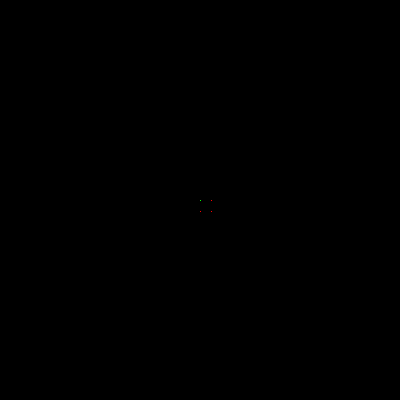

In [266]:
TopViewMap(70, 70, [Vec3(v.x + cube.position.x, v.y + cube.position.y, v.z + cube.position.z) for v in cube.vertices])

-- Local to world matrix --
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

-- World to camera matrix--
[[  1.   0.   0.   0.]
 [  0.   1.   0.   0.]
 [  0.   0.   1.   0.]
 [  0. -10. -20.   1.]]

-- Camera --
Angle of view: 60
Near clipping plane: 0.1
Far clipping plane: 100

-- Projection matrix --
S=1.7320508075688774
[[ 1.73205081  0.          0.          0.        ]
 [ 0.          1.73205081  0.          0.        ]
 [ 0.          0.         -1.001001   -1.        ]
 [ 0.          0.         -0.1001001   0.        ]]

-- Vertex transformation data --
World: (0, 2, 2)
Camera: (0.0, -8.0, -18.0, 1.0)
Projected: (0.0, -13.85640646055102, 17.018018018018015, 1.8018018018018016)
Vertex outside of clipping zone!

-- Vertex transformation data --
World: (2, 2, 2)
Camera: (2.0, -8.0, -18.0, 1.0)
Projected: (3.464101615137755, -13.85640646055102, 17.018018018018015, 1.8018018018018016)
Vertex outside of clipping zone!

-- Vertex transformation data --
World: 

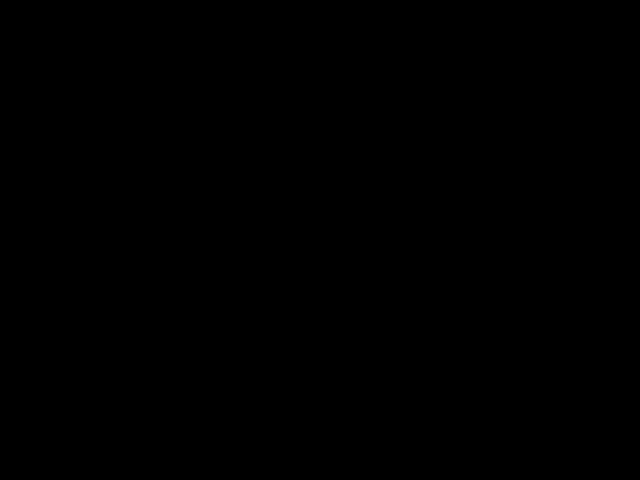

In [267]:
# Local to world matrix
matrixLocalToWorld = np.identity(4)
print('-- Local to world matrix --\r\n{}'.format(matrixLocalToWorld))

# World to camera matrix
matrixWorldToCamera = np.identity(4)
matrixWorldToCamera[3,1] = -10
matrixWorldToCamera[3,2] = -20
print('\r\n-- World to camera matrix--\r\n{}'.format(matrixWorldToCamera))

# Camera settings
fov = 60
far = 100
near = 0.1
print('\r\n-- Camera --\r\nAngle of view: {}\r\nNear clipping plane: {}\r\nFar clipping plane: {}'. format(fov, near, far))

# Projection matrix
matrixProjection = np.identity(4)
S = 1 / tan(fov * 0.5 * pi / 180)
matrixProjection[0,0] = S
matrixProjection[1,1] = S
matrixProjection[2,2] = -far / (far - near)
matrixProjection[3,2] = -far * near / (far - near)
matrixProjection[2,3] = -1
matrixProjection[3,3] = 0
print('\r\n-- Projection matrix --\r\nS={}\r\n{}'.format(S, matrixProjection))

# Generate image
width = 640
height = 480

img = Image.new('RGB', (width, height), 'black')
pixels = img.load()

for vertex in cube.vertices:
    print('\r\n-- Vertex transformation data --')
    
    # Vertex in world space
    worldX = vertex.x + cube.position.x
    worldY = vertex.y + cube.position.y
    worldZ = vertex.z + cube.position.z
    print('World: ({}, {}, {})'.format(worldX, worldY, worldZ))
    
    # Vertex shader; create homogeneous vector where w=1.
    worldVertex = np.dot(matrixLocalToWorld.T, np.array([worldX, worldY, worldZ, 1]))
    
    # Vertex in camera space
    cameraVertex = np.dot(matrixWorldToCamera.T, worldVertex)
    print('Camera: ({}, {}, {}, {})'.format(cameraVertex[0], cameraVertex[1], cameraVertex[2], cameraVertex[3]))
    
    # Homogeneous clip space
    projectedVertex = np.dot(matrixProjection, cameraVertex)
    print('Projected: ({}, {}, {}, {})'.format(projectedVertex[0], projectedVertex[1], projectedVertex[2], projectedVertex[3]))
    
    # Clipping
    if projectedVertex[0] < -1 or projectedVertex[0] > 1 or projectedVertex[1] < -1 or projectedVertex[1] > 1:
        print('Vertex outside of clipping zone!')
        continue
    
    # Perspective divide
    if projectedVertex[3] == 0:
        print('w=0')
        continue 
        
    projectedVertex[0] /= projectedVertex[3]
    projectedVertex[1] /= projectedVertex[3]
    projectedVertex[2] /= projectedVertex[3]
    projectedVertex[3] = 1
    print('Normalized: ({}, {}, {})'.format(projectedVertex[0], projectedVertex[1], projectedVertex[2], projectedVertex[3]))
    
    # NDC Space ([-1, 1]) to Raster space ([0, width-1], [0, height-1]) (Viewport transform)
    x = int(min(width - 1, (projectedVertex[0] + 1) * 0.5 * width))
    y = int(min(height - 1, (1 - (projectedVertex[1] + 1)) * 0.5 * height))
    print('Raster: ({}, {})'.format(x, y))
    
    if x < 0 or x > width - 1 or y < 0 or y > height - 1:
        print('Point outside of canvas.')
        continue
        
    pixels[x, y] = (255, 0, 0)

img    

In [268]:
import pygame, sys, math

https://www.youtube.com/watch?v=g4E9iq0BixA

In [288]:
pygame.init()

w, h = 400, 400;
cx, cy = w//2, h//2
screen = pygame.display.set_mode((w, h))
clock = pygame.time.Clock()

verts = (-1, 1, 1), ( 1, 1, 1), (-1, -1, 1), (-1, -1, -1), (-1, 1, -1), (-1, 1, -1), (1, 1, -1),  (1, -1, 1), (1, -1, -1)

while True:
    dt = clock.tick()/1000
    
    for event in pygame.event.get():
        if event.type == pygame.QUIT: pygame.quit(); sys.exit();
            
    screen.fill((255,255,255))
    
    for x, y, z in verts:
        z += 5
        f = 400/z
        x, y = x*f, y*f
        pygame.draw.circle(screen, (0, 0, 0), (cx+int(x), cy+int(y)), 6)
        
    pygame.draw.circle(screen, (0, 0, 0), (cx, cy), 2)    
    pygame.draw.line(screen, (0, 0, 0), (0,0), (cx, cy))    
    pygame.draw.line(screen, (0, 0, 0), (w,0), (cx, cy)) 
    pygame.draw.line(screen, (0, 0, 0), (0,h), (cx, cy)) 
    pygame.draw.line(screen, (0, 0, 0), (w,h), (cx, cy)) 
    pygame.display.flip()

SystemExit: 

c:\users\isomorphism\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
